<a href="https://colab.research.google.com/github/SudharsunRavi/VigiLens/blob/main/Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#Copying files
!cp -r /content/gdrive/MyDrive/VigiLens/Dataset/DS /content/custom_data

Mounted at /content/gdrive


In [13]:
!wget -O /content/train_val_split.py https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py

# TO DO: Improve robustness of train_val_split.py script so it can handle nested data folders, etc
!python train_val_split.py --datapath="/content/custom_data/" --train_pct=0.9

--2025-09-12 06:44:45--  https://raw.githubusercontent.com/EdjeElectronics/Train-and-Deploy-YOLO-Models/refs/heads/main/utils/train_val_split.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3203 (3.1K) [text/plain]
Saving to: ‘/content/train_val_split.py’

/content/train_val_ 100%[===================>]   3.13K  --.-KB/s    in 0s      

2025-09-12 06:44:45 (45.2 MB/s) - ‘/content/train_val_split.py’ saved [3203/3203]

Number of image files: 302
Number of annotation files: 301
Images moving to train: 271
Images moving to validation: 31


In [14]:
!pip install ultralytics

In [ ]:
import yaml
import os

def create_data_yaml(path_to_classes_txt, path_to_data_yaml):

  # Read class.txt to get class names
  if not os.path.exists(path_to_classes_txt):
    print(f'classes.txt file not found! Please create a classes.txt labelmap and move it to {path_to_classes_txt}')
    return
  with open(path_to_classes_txt, 'r') as f:
    classes = []
    for line in f.readlines():
      if len(line.strip()) == 0: continue
      classes.append(line.strip())
  number_of_classes = len(classes)

  # Create data dictionary
  data = {
      'path': '/content/data/',
      'train': 'train/images',
      'val': 'validation/images',
      'nc': number_of_classes,
      'names': classes
  }

  # Write data to YAML file
  with open(path_to_data_yaml, 'w') as f:
    yaml.dump(data, f, sort_keys=False)
  print(f'Created config file at {path_to_data_yaml}')

  return

# Define path to classes.txt and run function
path_to_classes_txt = '/content/custom_data/classes.txt'
path_to_data_yaml = '/content/data.yaml'

create_data_yaml(path_to_classes_txt, path_to_data_yaml)

print('\nFile contents:\n')
!cat /content/data.yaml

Created config file at /content/data.yaml

File contents:

path: /content/data/
train: train/images
val: validation/images
nc: 26
names:
- Air Conditioner
- Bag
- Bike Helmet
- Cabinet/drawer
- Chair
- Extension cord
- Keyboard
- Landline
- Laptop
- Laptop Charger
- Light
- Mouse
- Phone charger
- Printer/scanner
- Projector
- Smartphone
- Sofa
- Speaker
- TWS
- Table/desk
- Tablet/Ipad
- Television
- Water Bottle
- Wi-Fi Router / Modem
- Wired Headphones
- whiteboard/notice board


In [15]:
!yolo detect train data=/content/data.yaml model=yolov8n.pt epochs=60 imgsz=640

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

In [16]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=data/validation/images save=True

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs

image 1/83 /content/data/validation/images/003d1f27-IMG_6191.JPG: 544x640 1 Air Conditioner, 2 Bags, 4 Bike Helmets, 4 Chairs, 3 Laptops, 1 Smartphone, 1 Tablet/Ipad, 1 Water Bottle, 134.2ms
image 2/83 /content/data/validation/images/005bad89-20250818120816500_436779321101_436779321.jpg: 544x640 1 Air Conditioner, 15 Chairs, 1 Extension cord, 4 Table/desks, 1 Television, 2 Water Bottles, 9.0ms
image 3/83 /content/data/validation/images/0169c17e-20250818113318155_43677932111_436779321.jpg: 544x640 2 Cabinet/drawers, 4 Chairs, 1 Smartphone, 7.8ms
image 4/83 /content/data/validation/images/01d82865-PNG_image_17_vigilens.png: 544x640 2 Chairs, 1 Laptop, 1 Speaker, 7.3ms
image 5/83 /content/data/validation/images/025ba5a2-PNG_image_38_vigilens.png: 544x640 2 Bags, 2 Cabinet/drawers, 1 Chair, 1 Extension cord, 4 Laptops, 7.8ms
ima

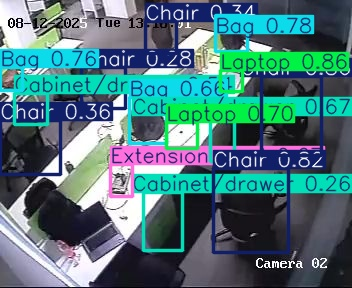

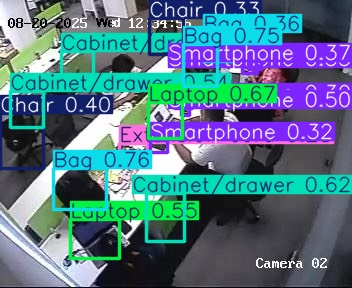

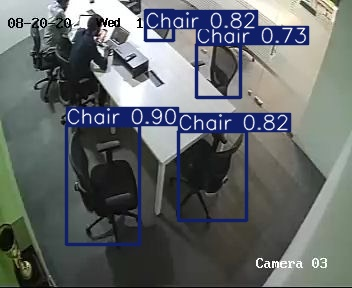

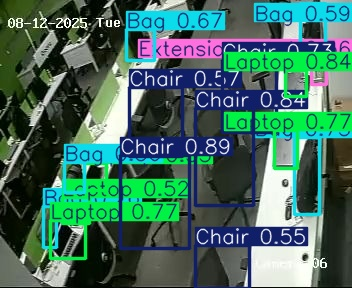

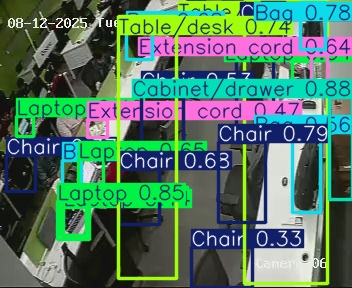

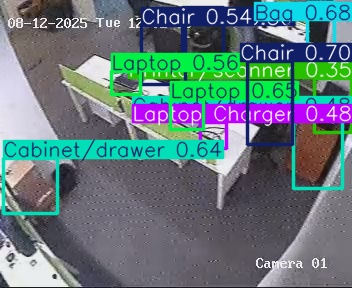

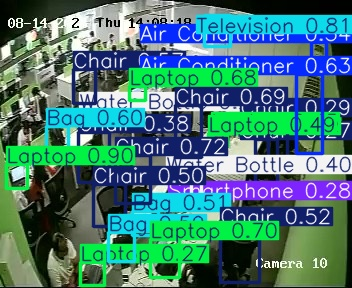

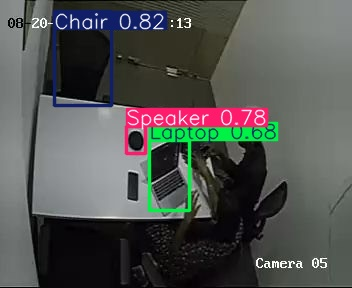

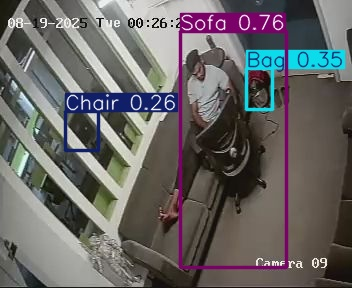

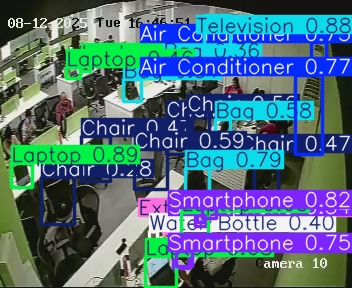

In [7]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [8]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/gdrive/MyDrive/VigiLens/Dataset/Test save=True


Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs

image 1/3 /content/gdrive/MyDrive/VigiLens/Dataset/Test/20250818102925183_43677932121_436779321.jpg: 544x640 3 Bags, 5 Chairs, 1 Extension cord, 3 Laptops, 1 Table/desk, 5 Water Bottles, 45.0ms
image 2/3 /content/gdrive/MyDrive/VigiLens/Dataset/Test/20250818102939902_436779321101_436779321.jpg: 544x640 2 Air Conditioners, 7 Bags, 12 Chairs, 1 Extension cord, 6 Laptops, 1 Smartphone, 1 Table/desk, 1 Television, 2 Water Bottles, 7.1ms
image 3/3 /content/gdrive/MyDrive/VigiLens/Dataset/Test/20250818103038524_43677932171_436779321.jpg: 544x640 1 Air Conditioner, 5 Bike Helmets, 10 Chairs, 1 Laptop, 1 Laptop Charger, 1 Table/desk, 2 Water Bottles, 7.2ms
Speed: 3.2ms preprocess, 19.8ms inference, 54.2ms postprocess per image at shape (1, 3, 544, 640)
Results saved to /content/runs/detect/predict5
💡 Learn more at https://docs.ultra

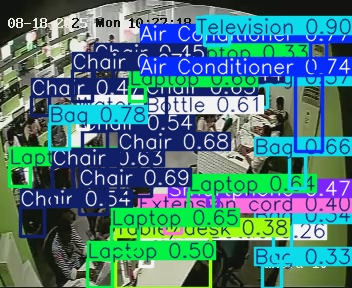

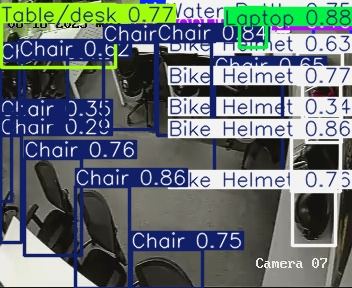

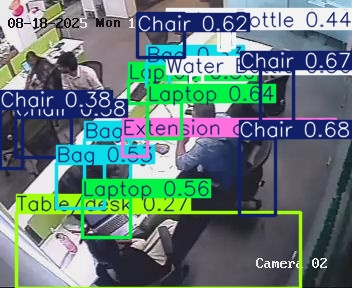

In [9]:
import glob
from IPython.display import Image, display
for image_path in glob.glob(f'/content/runs/detect/predict2/*.jpg')[:10]:
  display(Image(filename=image_path, height=400))
  print('\n')


In [27]:
!yolo detect predict model=runs/detect/train/weights/best.pt source=/content/gdrive/MyDrive/VigiLens/TestData/Test_vid2.mp4 save=True show=True save_txt=True save_conf=True      # save confidence scores in text files

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,010,718 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (frame 1/513) /content/gdrive/MyDrive/VigiLens/TestData/Test_vid2.mp4: 544x640 2 Air Conditioners, 1 Bag, 1 Chair, 6 Laptops, 1 Smartphone, 1 Television, 47.5ms
video 1/1 (frame 2/513) /content/gdrive/MyDrive/VigiLens/TestData/Test_vid2.mp4: 544x640 2 Air Conditioners, 1 Bag, 1 Chair, 6 Laptops, 1 Smartphone, 1 Television, 7.1ms
video 1/1 (frame 3/513) /content/gdrive/MyDrive/VigiLens/TestData/Test_vid2.mp4: 544x640 2 Air Conditioners, 1 Bag, 1 Chair, 7 Laptops, 1 Smartphone, 1 Television, 7.1ms
video 1/1 (frame 4/513) /content/gdrive/MyDrive/VigiLens/TestData/Test_vid2.mp4: 544x640 2 Air Conditioners, 2 Bags, 1 Chair, 7 Laptops, 1 Smartphone, 1 Television, 7.0ms
video 1/1 (frame 5/513) /content/gdrive/MyDrive/VigiLens/TestData/Test_vid2.mp4:

In [28]:
# Convert AVI to MP4 for easier viewing in Colab
!ffmpeg -i /content/runs/detect/predict9/Test_vid2.avi -c:v libx264 -c:a aac /content/runs/detect/predict9/converted_video.mp4

# Display the converted MP4
from IPython.display import HTML
from base64 import b64encode

mp4_path = '/content/runs/detect/predict9/converted_video.mp4'
mp4 = open(mp4_path, 'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=800 controls>
    <source src="{data_url}" type="video/mp4">
</video>
""")

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab